# CS - 512 Computer Vision
# Assignment -2
# Sai Manohar Vemuri
# A20514848

# 1.

In [7]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
%matplotlib qt
def nothing(x):
    pass
def apply_smooth(img):
    cv2.namedWindow('controls')
    cv2.resizeWindow('controls', 500, 100)
    cv2.createTrackbar('r','controls',1,255,nothing)
    height,width=img.shape[0],img.shape[1]
    while(1):
        smooth = int(cv2.getTrackbarPos('r','controls'))
        if(smooth!=0):
            kernel = np.ones((smooth, smooth), dtype=np.float32) / (smooth**2)
            new = cv2.filter2D(img,-1,kernel)
        else:
            new=img
        cv2.imshow('image',new)
        cv2.setWindowProperty('image', 1, cv2.WINDOW_NORMAL)
        cv2.resizeWindow('image', height, width)
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break
    cv2.destroyAllWindows()
img = cv2.imread('../data/img.jpg')
#for complex image
# img = cv2.imread('img1.jpg') 
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(img.shape[0]//2,img.shape[1]//2))
kernel = np.ones((5,5),np.float32)/25
apply_smooth(img)

ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

# 2. Python Implementation

In [2]:
import numpy as np

def img_smooth(image, kernel):
    input_height, input_width,channels = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = input_height
    output_width = input_width
    
    p_height=kernel_height//2
    p_width=kernel_width//2
    padded_image=np.pad(image,((p_height,p_height),(p_width,p_width),(0,0)),mode='constant')
    
    output = np.zeros((output_height, output_width,3),dtype='uint8')
    for c in range(channels):
        new_img=padded_image[:,:,c]
        for i in range(output_height):
            for j in range(output_width):
                output[i, j,c] = np.sum(new_img[i:i+kernel_height, j:j+kernel_width] * kernel)
    return output


In [3]:
def nothing(x):
    pass


def apply_smooth(img):
    cv2.namedWindow('controls')
    cv2.createTrackbar('r','controls',0,255,nothing)
    height,width=img.shape[0],img.shape[1]
    while(1):
        smooth= int(cv2.getTrackbarPos('r','controls'))
        kernel = np.ones((smooth, smooth), dtype=np.float32) / (smooth**2)
        new=img_smooth(img,kernel)
        #new=cv2.resize(new,(new.shape[0]//2,new.shape[1]//2))
        cv2.imshow('image',new)
        cv2.setWindowProperty('image', 1, cv2.WINDOW_NORMAL)
        cv2.resizeWindow('image', height, width)
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break
    cv2.destroyAllWindows()
    
apply_smooth(img)

# Cython Implementation

In [6]:
%%cmd
python setup.py build_ext --inplace

Microsoft Windows [Version 10.0.22621.1265]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Manohar Vemuri\OneDrive\MS\Computer Vision\cs512-s23-vemuri-saimanohar\AS2\src>python setup.py build_ext --inplace
running build_ext

C:\Users\Manohar Vemuri\OneDrive\MS\Computer Vision\cs512-s23-vemuri-saimanohar\AS2\src>

In [7]:
import time
import my

start = time.time()
img = cv2.imread('../data/img.jpg')
#for complex image
# img = cv2.imread('img1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(img.shape[0]//2,img.shape[1]//2))
my.apply_smooth(img)

end = time.time()
print("Execution Time in Seconds: ",end - start)

Execution Time in Seconds:  8.743125200271606


# 3.

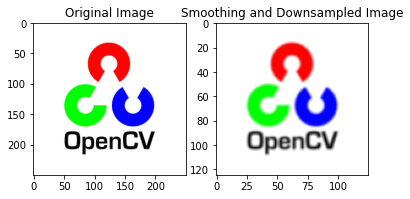

Original Image Shape: (250, 250, 3)
Downsampled Image Shape: (125, 125, 3)


In [8]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
%matplotlib inline
img = cv2.imread('../data/img.jpg')
#for complex image
# img = cv2.imread('img1.jpg')

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(img.shape[0]//2,img.shape[1]//2))
kernel = np.ones((5,5),np.float32)/25
img_new = cv2.filter2D(img,-1,kernel)
img_new=cv2.resize(img_new,(img_new.shape[0]//2,img_new.shape[1]//2))

plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img_new)
plt.title('Smoothing and Downsampled Image')
plt.show()
print('Original Image Shape:',img.shape)
print('Downsampled Image Shape:',img_new.shape)

# 4.

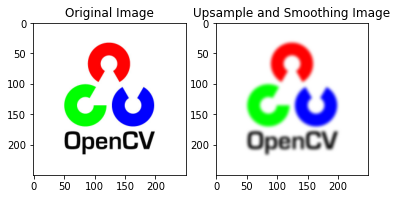

Original Image Shape: (250, 250, 3)
Upsampled Image Shape: (250, 250, 3)


In [9]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
%matplotlib inline
kernel = np.ones((5,5),np.float32)/25
img_new2=cv2.resize(img_new,(img_new.shape[0]*2,img_new.shape[1]*2))
img_new3 = cv2.filter2D(img_new2,-1,kernel)
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img_new3)
plt.title('Upsample and Smoothing Image')
plt.show()
print('Original Image Shape:',img.shape)
print('Upsampled Image Shape:',img_new3.shape)

# 5.

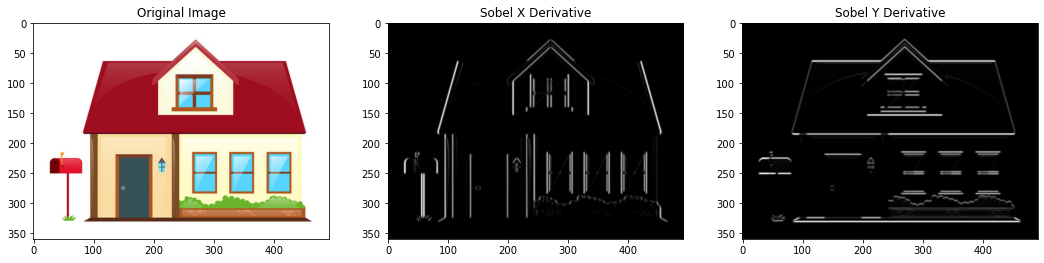

In [10]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
%matplotlib inline
img1=cv2.imread('../data/img1.jpg')
#for complex image
# img1 = cv2.imread('img2.jpg')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
sobelX=cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobelY=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
sobelX = np.uint8((np.absolute(sobelX)-np.min(np.absolute(sobelX))) / (np.max(np.absolute(sobelX)-np.min(np.absolute(sobelX))))*255)
sobelY = np.uint8((np.absolute(sobelY)-np.min(np.absolute(sobelY))) / (np.max(np.absolute(sobelY))-np.min(np.absolute(sobelY)))*255)
plt.figure(figsize=(18,12))
plt.subplot(131)
plt.imshow(img1,'gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow(sobelX,'gray')
plt.title('Sobel X Derivative')
plt.subplot(133)
plt.imshow(sobelY,'gray')
plt.title('Sobel Y Derivative')
plt.show()

# 6.

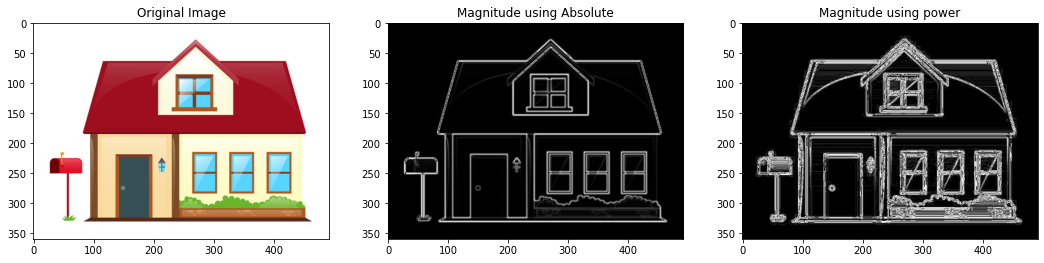

In [11]:
%matplotlib inline
magnitude = sobelX + sobelY
magnitude1 = np.sqrt(sobelX**2 + sobelY**2)
magnitude=(magnitude-np.min(magnitude))/(np.max(magnitude)-np.min(magnitude))*255
magnitude1=(magnitude1-np.min(magnitude1))/(np.max(magnitude1)-np.min(magnitude1))*255
plt.figure(figsize=(18,12))
plt.subplot(131)
plt.imshow(img1,'gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow(magnitude.astype(np.uint8),'gray')
plt.title('Magnitude using Absolute')
plt.subplot(133)
plt.imshow(magnitude1.astype(np.uint8),'gray')
plt.title('Magnitude using power')
plt.show()

# 7.

In [12]:
def gradient_vec(n):
    img2=img1.copy()
    if(n!=0):
        k=50
        #plt.imshow(img1)
        for y in range(0,img1.shape[0],n):
            for x in range(0,img1.shape[1],n):
                if mag[y,x] > 1:
                    dx=np.cos(np.deg2rad(ang[y,x]))
                    dy=np.sin(np.deg2rad(ang[y,x]))
                    pt1=(x, y)
                    pt2=(int(x+dx*mag[y, x]/k),int(y+dy*mag[y,x]/k))
                    cv2.arrowedLine(img2,pt1,pt2,(255,0,0),2)
        cv2.imshow('image',cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
    else:
        cv2.imshow('image',cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

sobelX=cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelY=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)
mag,ang=cv2.cartToPolar(sobelX, sobelY, angleInDegrees=True)
cv2.namedWindow('image')
cv2.createTrackbar('n', 'image', 5, 255, gradient_vec)
while True:
    k = cv2.waitKey(1) & 0xFF
    if k == 0:
        break
    n = cv2.getTrackbarPos('n', 'image')
    gradient_vec(n)
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


# 8.

In [13]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt

def harris_corner(n):
    img3=img1.copy()
    if(n!=0):
        kernel_size=5
        k=0.001
        gray=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        threshold=100
        corner_img=cv2.cornerHarris(gray, n, kernel_size, k)
        corner_img=np.absolute(corner_img)
        corner_img=(corner_img-np.min(corner_img))/(np.max(corner_img)-np.min(corner_img))*255
        corner_img = cv2.dilate(corner_img,None)
        img3[corner_img>0.1*corner_img.max()]=[255,0,0]
        cv2.imshow('image',cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
    else:
        cv2.imshow('image',cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

cv2.namedWindow('image')
cv2.createTrackbar('n', 'image', 3, 50, harris_corner)
while True:
    k = cv2.waitKey(1) & 0xFF
    if k == 0:
        break
    n = cv2.getTrackbarPos('n', 'image')
    harris_corner(n)
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


# 9.

In [14]:
def corner_method(img1):
    img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    sobelX = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobelY = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    xSq=sobelX**2
    ySq=sobelY**2
    xy=sobelX*sobelY
    corner=np.zeros_like(gray,dtype=np.float32)
    kernel_size=7
    t=100
    k=0.05
    m=kernel_size//2
    for y in range(kernel_size//2,img1.shape[0]-kernel_size//2):
        for x in range(m,img1.shape[1]-m):
            xSqWindow=xSq[y-m:y+kernel_size-1,x-m:x+kernel_size-1]
            ySqWindow=ySq[y-m:y+kernel_size-1,x-m:x+kernel_size-1]
            xyWindow=xy[y-m:y+kernel_size-1,x-m:x+kernel_size-1]
            correlation_matrix=np.array([[xSqWindow.sum(),xyWindow.sum()],[xyWindow.sum(),ySqWindow.sum()]])
            eigenvector=np.linalg.eigvals(correlation_matrix)
            corner_val=eigenvector.prod()-k*eigenvector.sum()**2 #harris corners formula
            if(corner_val>t):
                corner[y,x]=corner_val
    corner=(corner-np.min(corner))/(np.max(corner)-np.min(corner))*255
    corner=corner.astype(np.uint8)
    corner1,corner=cv2.threshold(corner,25,255,cv2.THRESH_BINARY)
    #print(thres.shape)
    #corner=np.array(corner)
    #corner=corner.astype(np.float64)
    return corner


In [15]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
img=cv2.imread('../data/img1.jpg')
img1=cv2.imread('../data/img2.jpg')
res=corner_method(img)
res1=corner_method(img1)

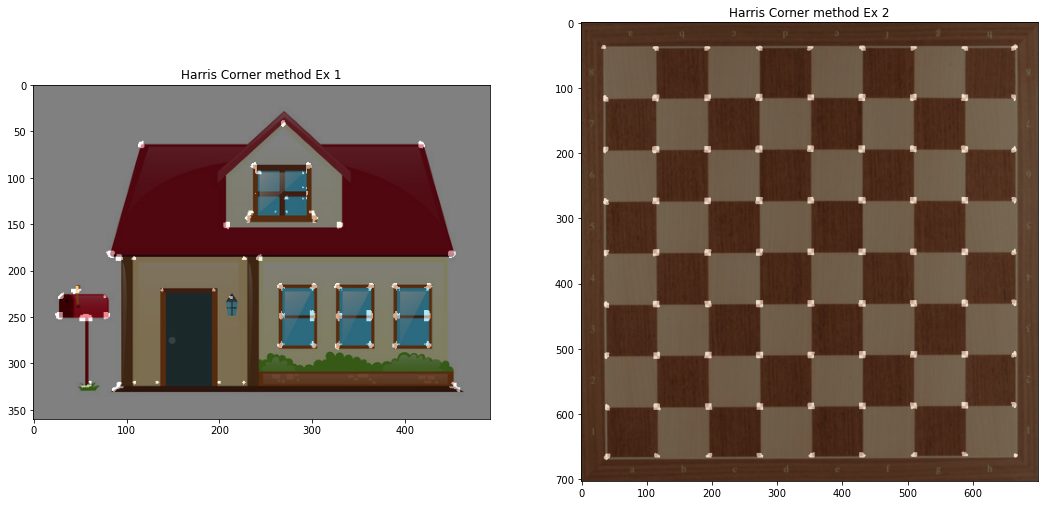

In [16]:
beta = 0.5
dst = cv2.addWeighted(img, 0.5, cv2.cvtColor(res,cv2.COLOR_GRAY2RGB), beta, 0.0)
dst1 = cv2.addWeighted(img1, 0.5, cv2.cvtColor(res1,cv2.COLOR_GRAY2RGB), beta, 0.0)
plt.figure(figsize=(18,12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.title('Harris Corner method Ex 1')
plt.subplot(122)
plt.imshow(cv2.cvtColor(dst1,cv2.COLOR_BGR2RGB))
plt.title('Harris Corner method Ex 2')
plt.show()

# 10.

In [17]:
def gaussian_smoothing(img):
    return cv2.GaussianBlur(img,(3,3),cv2.BORDER_DEFAULT)

In [18]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(len(X_train)):
    X_train[i]=gaussian_smoothing(X_train[i])
for j in range(len(X_test)):
    X_test[j]=gaussian_smoothing(X_test[j])



# Preprocess the data
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1264 - accuracy: 0.9626
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0903 - accuracy: 0.9731
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0709 - accuracy: 0.9786
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9773
Test loss: 0.07287976890802383
Test accuracy: 0.9772999882698059


In [19]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)
for i in range(len(X_train)):
    X_train[i]=gaussian_smoothing(X_train[i])
for j in range(len(X_test)):
    X_test[j]=gaussian_smoothing(X_test[j])
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train.reshape(-1,28*28), y_train, epochs=5, batch_size=128)

test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,28*28), y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3066 - accuracy: 0.9142
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1465 - accuracy: 0.9569
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1110 - accuracy: 0.9667
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0896 - accuracy: 0.9726
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9758
Test loss: 0.07780136913061142
Test accuracy: 0.9757999777793884


In [20]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)
for i in range(len(X_train)):
    X_train[i]=gaussian_smoothing(X_train[i])
for j in range(len(X_test)):
    X_test[j]=gaussian_smoothing(X_test[j])
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train.reshape(-1,28*28), y_train, epochs=5, batch_size=128)

test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,28*28), y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3370 - accuracy: 0.9034
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1644 - accuracy: 0.9515
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1259 - accuracy: 0.9623
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1038 - accuracy: 0.9687
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9710
Test loss: 0.09125039726495743
Test accuracy: 0.9710000157356262


# 11.

In [1]:
def gaussian_smoothing(img):
    return cv2.GaussianBlur(img,(3,3),cv2.BORDER_DEFAULT)
def mag_calc(img1):
    img1=gaussian_smoothing(img1)
    img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    sobelX=cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobelY=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
    #magnitude = np.sqrt(sobelX**2 + sobelY**2)
    #sobelX = np.uint8((np.absolute(sobelX)-np.min(np.absolute(sobelX))) / (np.max(np.absolute(sobelX)-np.min(np.absolute(sobelX))))*255)
    #sobelY = np.uint8((np.absolute(sobelY)-np.min(np.absolute(sobelY))) / (np.max(np.absolute(sobelY))-np.min(np.absolute(sobelY)))*255)
    magnitude,ang=cv2.cartToPolar(sobelX, sobelY, angleInDegrees=True)
    return magnitude

In [8]:
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(len(X_train)):
    X_train[i]=mag_calc(X_train[i])
for j in range(len(X_test)):
    X_test[j]=mag_calc(X_test[j])
    
# Preprocess the data
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.6654 - accuracy: 0.7810
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.8460
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8701
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3328 - accuracy: 0.8867
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4375 - accuracy: 0.8574
Test loss: 0.4374886751174927
Test accuracy: 0.8574000000953674


In [9]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)
for i in range(len(X_train)):
    X_train[i]=mag_calc(X_train[i])
for j in range(len(X_test)):
    X_test[j]=mag_calc(X_test[j])
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train.reshape(-1,28*28), y_train, epochs=5, batch_size=128)

test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,28*28), y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.2580 - accuracy: 0.7481
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5094 - accuracy: 0.8317
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4500 - accuracy: 0.8496
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8647
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8634
Test loss: 0.42202791571617126
Test accuracy: 0.8633999824523926


In [24]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)
for i in range(len(X_train)):
    X_train[i]=mag_calc(X_train[i])
for j in range(len(X_test)):
    X_test[j]=mag_calc(X_test[j])
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train.reshape(-1,28*28), y_train, epochs=5, batch_size=128)

test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,28*28), y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 32.1437 - accuracy: 0.6707
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 3.5680 - accuracy: 0.6450
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 1.2713 - accuracy: 0.6043
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 1.0088 - accuracy: 0.6781
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.8374 - accuracy: 0.7336
Test loss: 0.8373913168907166
Test accuracy: 0.7336000204086304
